In [ ]:
# METODO DE DICONOMIA/BISECCION

import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) 
fEpxr = x**3 - 2*x**2
f = sp.Lambda(x,fEpxr)
print(fEpxr)

solutions = sp.solve(fEpxr, x)
print("Soluciones donde la funcion es igual a 0:", solutions)

nMax = 100
tol = 1.e-10
a = 1.
b = 2.5

if f(a) * f(b) > 0:
    print('f(a) y f(b) deben tener signos opuestos')

xAprox = np.zeros(nMax)

print('Iteración | Aproximación | Error | Error relativo')

for k in range(0,nMax):
    xAprox[k] = (a+b) / 2

    if f(xAprox[k]) == 0: break
      
    if f(a) * f(xAprox[k]) < 0:
        b = xAprox[k]
    else:
       a = xAprox[k]

    relativeError = np.abs( xAprox[k]-xAprox[k-1] ) / np.abs( xAprox[k] )
    
    print(k+1, ' ', round(xAprox[k], 10), ' ', '{:.5f}'.format(abs(a-b)/pow(2,k+1)), ' ', '{:.5f}'.format(relativeError) )

    if ( (k > 0) and ( relativeError < tol ) ): break

print('Número de iteraciones realizadas: ', k+1) 
      # NOTA: Contamos 1 más, k+1, porque empezamos el bucle en 0
print('Aproximación de la raíz: ', xAprox[k])
    
print(f"{f(xAprox[k]):.20f}")

x**3 - 2*x**2
Solutions where the equation equals 0: [0, 2]
Iteración | Aproximación | Error | Error relativo
1   1.75   0.37500   1.00000
2   2.125   0.09375   0.17647
3   1.9375   0.02344   0.09677
4   2.03125   0.00586   0.04615
5   1.984375   0.00146   0.02362
6   2.0078125   0.00037   0.01167
7   1.99609375   0.00009   0.00587
8   2.001953125   0.00002   0.00293
9   1.9990234375   0.00001   0.00147
10   2.0004882812   0.00000   0.00073
11   1.9997558594   0.00000   0.00037
12   2.0001220703   0.00000   0.00018
13   1.9999389648   0.00000   0.00009
14   2.0000305176   0.00000   0.00005
15   1.9999847412   0.00000   0.00002
16   2.0000076294   0.00000   0.00001
17   1.9999961853   0.00000   0.00001
18   2.0000019073   0.00000   0.00000
19   1.9999990463   0.00000   0.00000
20   2.0000004768   0.00000   0.00000
21   1.9999997616   0.00000   0.00000
22   2.0000001192   0.00000   0.00000
23   1.9999999404   0.00000   0.00000
24   2.0000000298   0.00000   0.00000
25   1.9999999851   0.0

     3        2
1.0⋅x  - 2.0⋅x 
Valor de la expresion -3.0
Value 1 :  -16.0
Value 2 :  8.0
Value 3 :  -3.0
Value 4 :  1.0


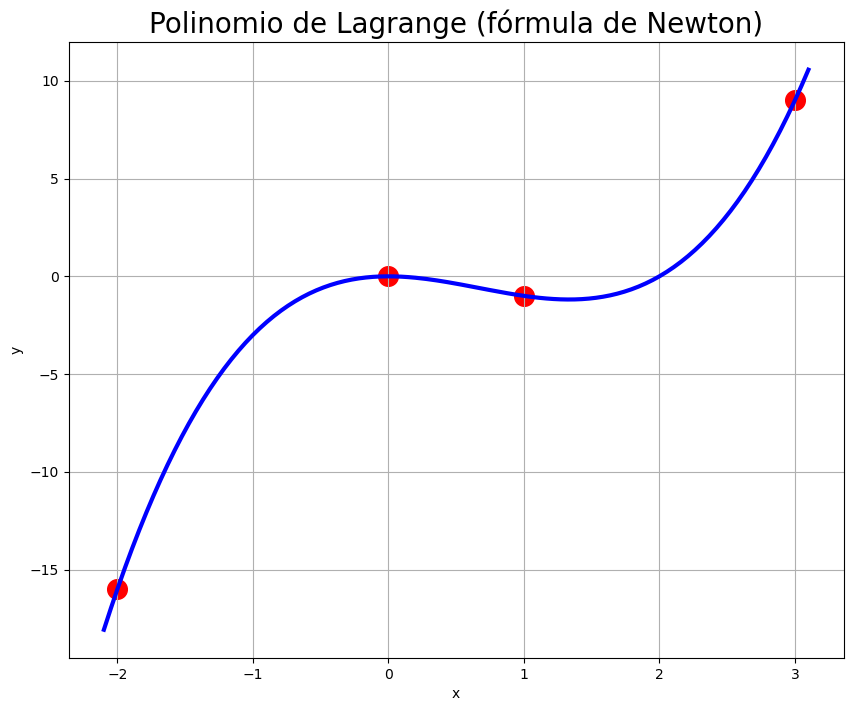

In [38]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x = sp.Symbol("x", real = True)

x_coef = np.array([-2, 0, 1, 3])
y_coef = np.array([-16, 0, -1, 9])

n = len(x_coef)

# Almacenaremos en "tabla" la matriz de diferencias divididas
tabla = np.zeros([n, n])

# La primera columna serán los datos en y
tabla[:,0] = y_coef

# Necesitamos un doble bucle para crear el resto de "tabla"
for j in range(1,n):
    for i in range(n-j):
        tabla[i,j] = (tabla[i+1,j-1] - tabla[i,j-1]) / (x_coef[i+j]-x_coef[i])

# Definimos la expresión para el Polinomio de Lagrange (versión Newton)
P_expr = tabla[0,0]
multiplica = sp.S('1')
for k in range(1,n):
    multiplica = multiplica * (x - x_coef[k-1])
    P_expr = P_expr + tabla[0,k] * multiplica

# Print the polynomial expression as a sympy object
sp.pprint(sp.expand(P_expr))

# Creamos la función lambdify para dibujarla
P = sp.lambdify(x,P_expr)

print('Valor de la expresion', P(-1))

for i in range(n):
    print('Value', i + 1, ': ', tabla[0][i])

xx = np.linspace(-2.1, 3.1, 200)
P_vec = P(xx)

# dibujamos el resultado
fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(xx, P_vec, 'b', lw='3')
plt.title('Polinomio de Lagrange (fórmula de Newton)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()